Sklonujmy sobie najpierw repozytorium z danymi

In [ ]:
!git clone https://github.com/matzim95/ML-datasets

!ls ML-datasets 

# Budowa modelu na danych rzeczywistych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

def prepare_dataset(dataset_name):
    params = {'iris': {'class_column': 'species', 'index_col': None},
              'wine': {'class_column': 'Class', 'index_col': None},
              'glass': {'class_column': 'Type', 'index_col': 'ID'},
              'diabetes': {'class_column': 'Class', 'index_col': None}}
    dataset, classes = load_dataset(dataset_name,
                                    **params[dataset_name])
    y = dataset.pop('class')
    X = dataset
    return X, y, classes

Skorzystamy ze zbioru diabets

In [2]:
X,y,classes = prepare_dataset('diabetes')

In [3]:
X.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [4]:
y.value_counts()

0    500
1    268
Name: class, dtype: int64

Podejrzyjmy co to za zbór

In [5]:
classes

array(['positive', 'negative'], dtype=object)

In [6]:
X.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [7]:
X.isna().sum()

Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skin fold thickness     0
2-Hour serum insulin            0
Body mass index                 0
Diabetes pedigree function      0
Age                             0
dtype: int64

Dzielimy dataset na zbiory treningowy i testowy

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

In [9]:
print(y_train.value_counts())
print(y_test.value_counts())

0    375
1    201
Name: class, dtype: int64
0    125
1     67
Name: class, dtype: int64


In [10]:
67/125

0.536

In [11]:
201/375

0.536

Trenujemy model na danych treningowych

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=30, max_iter=500)
model.fit(X_train, y_train)

In [13]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

Stwórzmy następnie macierz pomyłek i wyliczmy miary jakości klasyfikacji

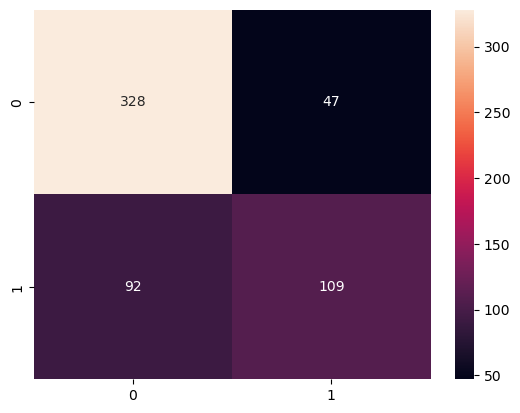

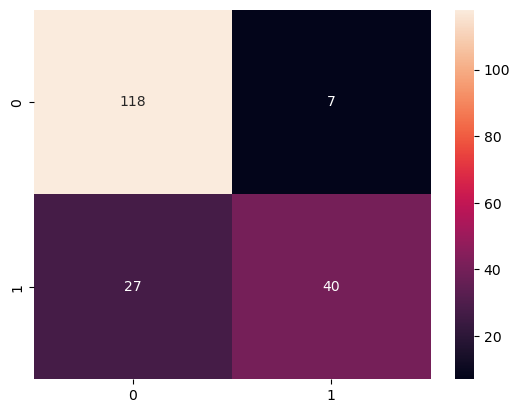

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm_train, annot = True, fmt = 'd')
plt.show()

sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

In [15]:
from sklearn.metrics import f1_score
print(f'F-Score train: {f1_score(y_train, y_pred_train)}, F-Score test: {f1_score(y_test, y_pred)}')

F-Score train: 0.6106442577030812, F-Score test: 0.7017543859649124


Możemy też obliczyć wartości pozostałych metryk klasyfikacji korzystając z wbudowanych funkcji.

Sprawdzenie też czy model jest przetrenowany:

In [16]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred)

In [17]:
df_dict = {'train':[accuracy_train, precision_train, recall_train, f1_train],
          'test': [accuracy_test, precision_test, recall_test, f1_test]}

df = pd.DataFrame\
.from_dict(df_dict,
           orient = 'index',
           columns = ['accuracy', 'precision', 'recall', 'f-score'])\
.reset_index()\
.melt(id_vars = 'index', var_name = 'metric')

In [18]:
df

,index,metric,value
0,train,accuracy,0.758681
1,test,accuracy,0.822917
2,train,precision,0.698718
3,test,precision,0.851064
4,train,recall,0.542289
5,test,recall,0.597015
6,train,f-score,0.610644
7,test,f-score,0.701754


Możemy jeszcze spróbować wyświetlić to w formie wykresu.

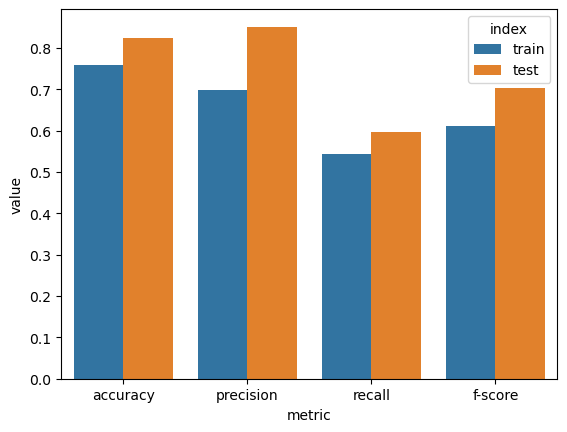

In [19]:
sns.barplot(x='metric', y = 'value', hue = 'index', data =df);

Możemy też regresję logistyczną zastosować dla zbiorów o wielu etykietach. Stosujemy wówczas strategię One versus Rest (trenujemy tyle klasyfikatorów, ile mamy klas) - sklearn robi to automatycznie.

In [20]:
X, y, classes = prepare_dataset('iris')
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.3, random_state=30)

In [21]:
y.value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [22]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

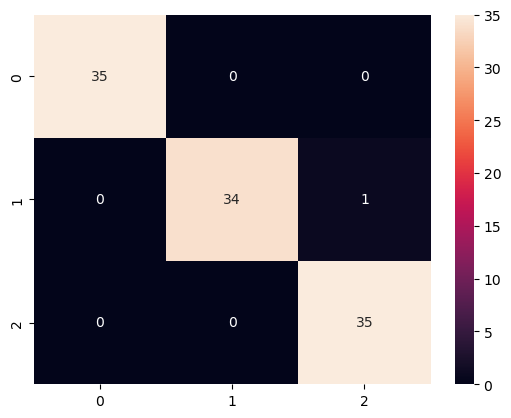

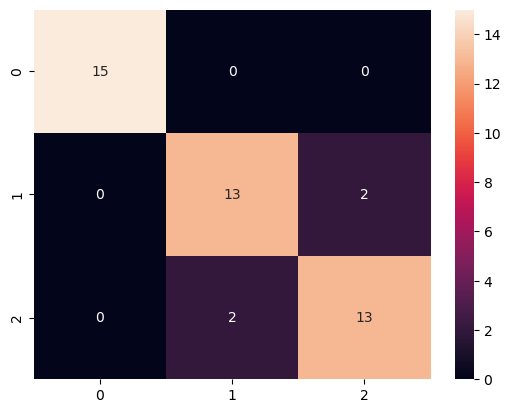

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm_train, annot = True, fmt = 'd')
plt.show()

sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

In [26]:
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

recall_train = recall_score(y_train, y_pred_train, average='macro')
recall_test = recall_score(y_test, y_pred, average='macro')

precision_train = precision_score(y_train, y_pred_train, average='macro')
precision_test = precision_score(y_test, y_pred, average='macro')

f1_train = f1_score(y_train, y_pred_train, average='macro')
f1_test = f1_score(y_test, y_pred, average='macro')

In [28]:
df_dict = {'train':[accuracy_train, precision_train, recall_train, f1_train],
          'test': [accuracy_test, precision_test, recall_test, f1_test]}

df = pd.DataFrame\
.from_dict(df_dict,
           orient = 'index',
           columns = ['accuracy', 'precision', 'recall', 'f-score'])\
.reset_index()\
.melt(id_vars = 'index', var_name = 'metric')

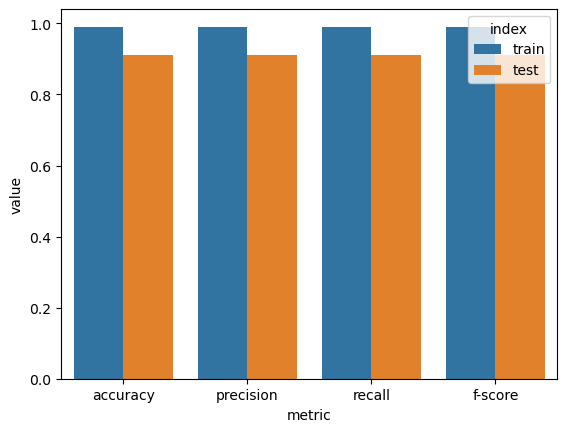

In [29]:
sns.barplot(x='metric', y = 'value', hue = 'index', data =df);

**Zadanie:**

Dla zbioru danych diabets wytrenuj model regresji logistycznej i narysuj krzywą ROC. Zwróć uwagę na różnice w funkcjach:
* predict()
* predict_proba()

Patrząc na krzywą ROC zastanów się czy model jest dobrze wytrenowany, przetrenowany czy wytrenowany niewystarczająco dobrze.

In [90]:
X,y,classes = prepare_dataset('diabetes')

In [53]:
X.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [54]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int8

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

In [56]:
len(X_train)

576

In [57]:
len(X_test)

192

In [40]:
X_train.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
596,0,67,76,0,0,45.3,0.194,46
226,0,101,76,0,0,35.7,0.198,26
20,3,126,88,41,235,39.3,0.704,27
64,7,114,66,0,0,32.8,0.258,42
399,3,193,70,31,0,34.9,0.241,25


In [41]:
y_train.head()

596    0
226    0
20     0
64     1
399    1
Name: class, dtype: int8

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=30, max_iter = 500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=30)

In [44]:
X_test.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
462,8,74,70,40,49,35.3,0.705,39
456,1,135,54,0,0,26.7,0.687,62
384,1,125,70,24,110,24.3,0.221,25
746,1,147,94,41,0,49.3,0.358,27
403,9,72,78,25,0,31.6,0.280,38


In [60]:
y_pred = model.predict(X_test)

In [61]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int8)

In [68]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba_train = model.predict_proba(X_train)

In [67]:
y_pred_proba

array([[0.68463279, 0.31536721],
       [0.94533559, 0.05466441],
       [0.21818164, 0.78181836],
       [0.90677078, 0.09322922],
       [0.70243348, 0.29756652],
       [0.8203267 , 0.1796733 ],
       [0.70108422, 0.29891578],
       [0.64585808, 0.35414192],
       [0.76940763, 0.23059237],
       [0.18080025, 0.81919975],
       [0.9397258 , 0.0602742 ],
       [0.12327373, 0.87672627],
       [0.76901555, 0.23098445],
       [0.08648947, 0.91351053],
       [0.16351284, 0.83648716],
       [0.747486  , 0.252514  ],
       [0.80934462, 0.19065538],
       [0.18581515, 0.81418485],
       [0.370599  , 0.629401  ],
       [0.80894025, 0.19105975],
       [0.88907186, 0.11092814],
       [0.8543101 , 0.1456899 ],
       [0.77386851, 0.22613149],
       [0.88035931, 0.11964069],
       [0.10547097, 0.89452903],
       [0.75656056, 0.24343944],
       [0.9067135 , 0.0932865 ],
       [0.70448588, 0.29551412],
       [0.1215819 , 0.8784181 ],
       [0.79968602, 0.20031398],
       [0.

Korzystając z wbudwanej funkcji sklearn roc_auc_score importowanej podobnie jak accuracy_score, precision_score, recall_score, f1_score z modułu sklearn.metrics oblicz pole pod krzywą ROC:

In [69]:
from sklearn.metrics import roc_curve

fpr, tpr, treshold = roc_curve(y_test, y_pred_proba[:,1], drop_intermediate=False)
fpr_t, tpr_t, treshold_t = roc_curve(y_train, y_pred_proba_train[:,1], drop_intermediate=False)

In [74]:
import matplotlib.pyplot as plt

def plot_roc(fpr_t, tpr_t, fpr, tpr):
    plt.figure(figsize = (10,6))
    plt.plot(fpr_t, tpr_t, c = 'red', label = 'Train')
    plt.plot(fpr, tpr, c = 'blue', label = 'Test')
    plt.axis([0,1,0,1])
    plt.plot([0,1], [0,1], 'k--', c ='black')
    plt.title('ROC')
    plt.legend()

C:\Users\kacpe\AppData\Local\Temp\ipykernel_14724\2915646692.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1], [0,1], 'k--', c ='black')


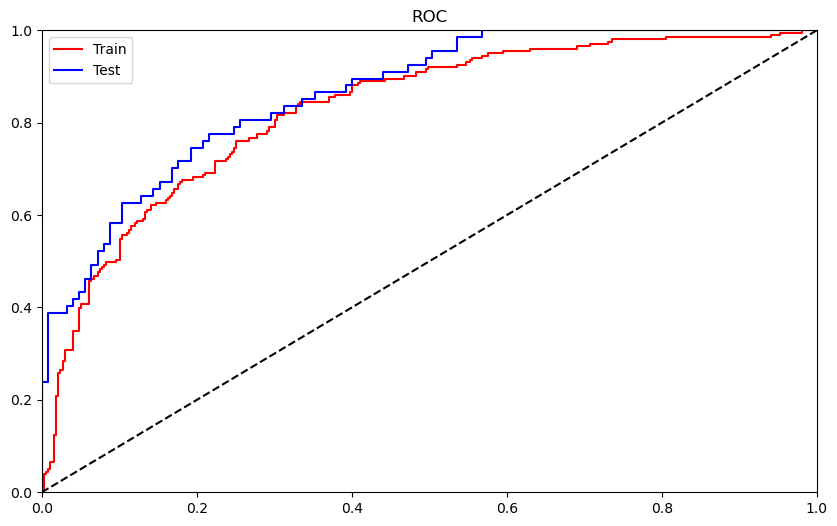

In [75]:
plot_roc(fpr_t, tpr_t, fpr, tpr)

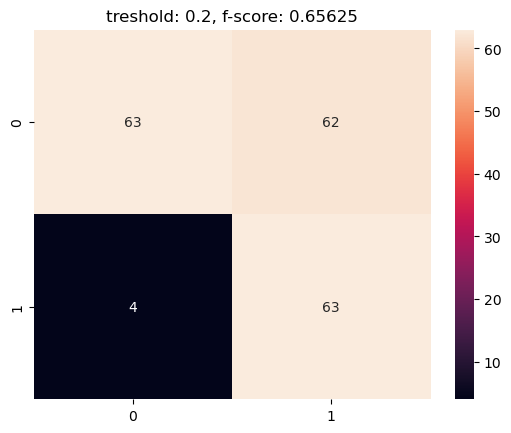

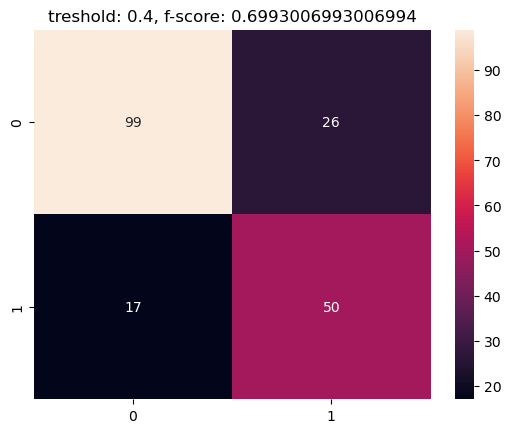

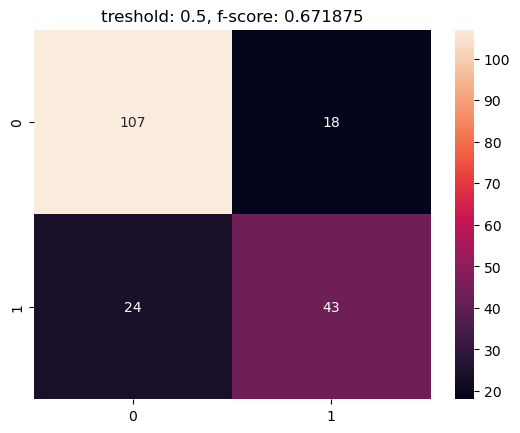

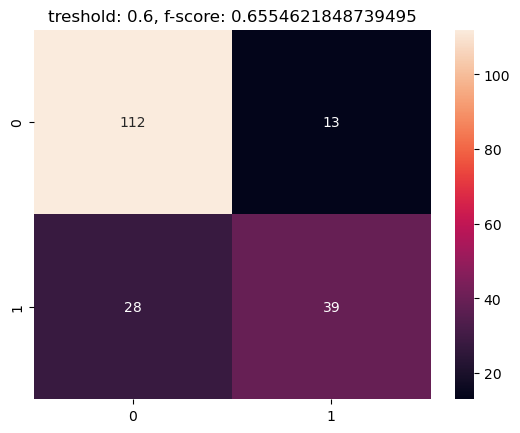

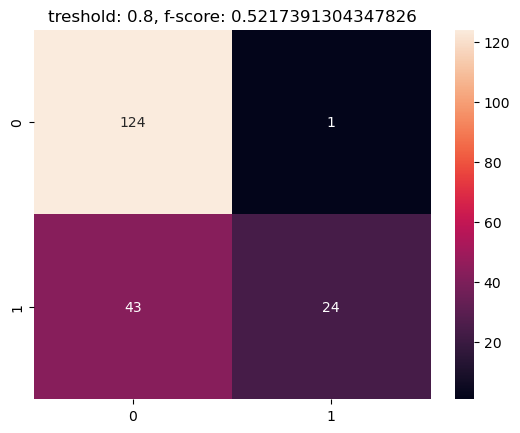

In [78]:
tresholds = [0.2, 0.4, 0.5, 0.6, 0.8]

for treshold in tresholds:
    y_pred = []
    for y in y_pred_proba[:,1]:
        if y > treshold:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    cm = confusion_matrix(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    sns.heatmap(cm, annot = True, fmt = 'd')
    title = f'treshold: {treshold}, f-score: {f}'
    plt.title(title)
    plt.show()
    

In [84]:
from sklearn.metrics import roc_auc_score

auc_train = roc_auc_score(y_train, y_pred_proba_train[:,1])
auc_test = roc_auc_score(y_test, y_pred_proba[:,1])

print(f'Pole pod krzywą ROC dla zestawu treningowego: {round(auc_train,2)}')
print(f'Pole pod krzywą ROC dla zestawu testowego: {round(auc_test,2)}')

Pole pod krzywą ROC dla zestawu treningowego: 0.83
Pole pod krzywą ROC dla zestawu testowego: 0.86


**Zadanie:** Przetestuj walidację krzyżową na analizowanym wcześniej zbiorze:

In [86]:
from sklearn.model_selection import cross_val_score

iteracja 1: trening: a,b,c,d, test: e <br>
iteracja 2: trening: a,b,c,e, test: d <br>
iteracja 3: trening: a,b,d,e, test: c <br>
iteracja 4: trening: a,c,d,e, test: b <br>
iteracja 5: trening: b,c,d,e, test: a <br>

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=30)

In [92]:


model = LogisticRegression(random_state = 30, max_iter = 500)

scores = cross_val_score(model, X_train, y_train, cv=5, scoring = 'precision_macro',)

In [93]:
scores

array([0.70767575, 0.64978214, 0.77505447, 0.80588235, 0.8331044 ])

# Regularyzacja, czyli jak przeciwdziałać overfittingowi. Czy to jest w ogóle problem? Sprawdźmy!

In [94]:
wine, wine_classes = load_dataset('wine', 'Class')

In [95]:
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [96]:
y = wine.pop('class')

In [99]:
X = wine

In [100]:
y.value_counts()

2    71
0    59
1    48
Name: class, dtype: int64

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=30, stratify=y, random_state=30)
model = LogisticRegression(random_state=30, max_iter=100)
model.fit(X_train, y_train)

In [118]:
#from sklearn import make_scorer

model = LogisticRegression(random_state = 30, max_iter = 1500)

scores_precision = cross_val_score(model, X_train, y_train, cv=5, scoring='precision_macro')
scores_recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall_macro')

C:\Program Files\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Program Files\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [119]:
print(scores_precision)
print(scores_recall)

[0.97435897 0.96296296 0.91538462 0.96296296 0.89469697]
[0.96666667 0.97222222 0.89722222 0.97222222 0.89772727]


In [109]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

f_train = f1_score(y_train, y_pred_train, average='weighted')
f_test = f1_score(y_test, y_pred, average='weighted')

print(f'f-score na zbiorze treningowym: {f_train}')
print(f'f-score na zbiorze testowym: {f_test}')

f-score na zbiorze treningowym: 0.9729101954187864
f-score na zbiorze testowym: 0.8997452788757135


Regularyzacja:

In [120]:
model = LogisticRegression(random_state=30, max_iter=100, penalty = 'l2', C=0.1)
model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

f_train = f1_score(y_train, y_pred_train, average='weighted')
f_test = f1_score(y_test, y_pred, average='weighted')

print(f'f-score na zbiorze treningowym: {f_train}')
print(f'f-score na zbiorze testowym: {f_test}')

f-score na zbiorze treningowym: 0.9594800986553564
f-score na zbiorze testowym: 0.933015873015873


C:\Program Files\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Przetestujmy teraz jednocześnie wiele wartości parametru regularyzacji

In [123]:
import numpy as np

C_values = [10.0**x for x in np.arange(-3,2,1)]

print(C_values)

[0.001, 0.01, 0.1, 1.0, 10.0]


In [125]:
train_err = []
valid_err = []

for C_value in C_values:
    model = LogisticRegression(random_state=30, max_iter=100, penalty = 'l2', C=C_value)
    model.fit(X_train, y_train)
    
    train_err.append(model.score(X_train, y_train))
    valid_err.append(model.score(X_test, y_test))

C:\Program Files\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Program Files\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [126]:
train_err

[0.8108108108108109,
 0.9459459459459459,
 0.9594594594594594,
 0.972972972972973,
 0.9797297297297297]

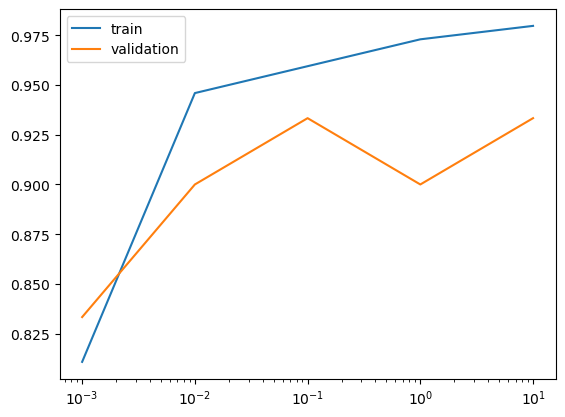

In [127]:
plt.semilogx(C_values, train_err, C_values, valid_err)
plt.legend(('train', 'validation'))
plt.show()

Skorzystajmy teraz z metody Grid Search. Regularyzacja l1 udostępnia selekcję cech, o możemy zobaczyć tu:

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
lr = LogisticRegression(solver ='liblinear', random_state=30)

params = {'C':[10.0**x for x in np.arange(-3,2,1)],
         'penalty': ['l1', 'l2'],
         'max_iter': [100, 300, 500]}

In [131]:
searcher = GridSearchCV(lr, param_grid=params, cv = 3, n_jobs=-1)
searcher.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(random_state=30, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'max_iter': [100, 300, 500], 'penalty': ['l1', 'l2']})

In [134]:
best_lr = searcher.best_estimator_
best_params = searcher.best_params_

In [136]:
coefs = best_lr.coef_

In [137]:
coefs

array([[-1.41163964e-01,  1.39206235e-01,  1.31606370e-01,
        -4.41857367e-01, -4.27735386e-02,  1.90438260e-01,
         4.47679216e-01, -2.96643449e-02,  1.04343639e-01,
        -1.08606529e-01, -1.23387479e-02,  2.98661852e-01,
         1.51025533e-02],
       [-1.52568737e-01,  3.74196920e-01,  1.46272868e-02,
         6.24525880e-02,  3.72547303e-03, -3.28771945e-01,
        -7.49339889e-01,  3.59374072e-05, -3.20350039e-01,
         7.42968875e-01, -1.69847206e-01, -5.40153209e-01,
        -2.24026805e-03],
       [ 2.73268529e-01, -4.87516258e-01, -1.31775982e-01,
         1.79426810e-01,  2.22246920e-02,  1.39446332e-01,
         2.44629328e-01,  5.66099083e-02,  1.33228642e-01,
        -9.40003948e-01,  2.04549988e-01,  2.65911888e-01,
        -9.00409188e-03]])

In [135]:
best_params

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}

best_lr = model = LogisticRegression('C'= 0.1, 'max_iter'= 100, 'penalty'= 'l2', random_state=30, solver ='liblinear')

# Granice decyzyjne na sztucznie wygenerowanym zbiorze:

Zaczniemy od wygenerowania sztucznego zbioru do klasyfikacji, składającego się z dwóch zbiorów punktów z rozkładu normalnego.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# losowe dane dla dwóch klas, przy przesunięciu środka rozkładu
train_data = np.vstack((np.random.normal(size=(100, 2)),
                        np.random.normal(size=(100, 2), loc=2)))

train_labels = np.hstack((np.zeros(100), np.ones(100)))


# np.vstack - połaczenie tablic wertykalne
# np.hstack - połączenie tablic horyzontalne

In [2]:
train_data.shape

(200, 2)

In [3]:
train_data[:10]

array([[-1.76315017,  0.60064286],
       [-0.63829429, -0.19930924],
       [ 2.06958294,  0.92963971],
       [ 0.42650095, -0.33729354],
       [-1.03386728,  0.30883137],
       [-0.50495733, -0.19299474],
       [-0.32481732,  0.47871613],
       [-0.41703205,  1.09252773],
       [ 0.62237026, -1.65892294],
       [ 0.77067265,  0.23048158]])

In [4]:
train_data.shape

(200, 2)

In [5]:
train_labels[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Wyświetlimy je w postaci wykresu punktowego, wraz z linią dokładnie pomiędzy środkami obu rozkładów:

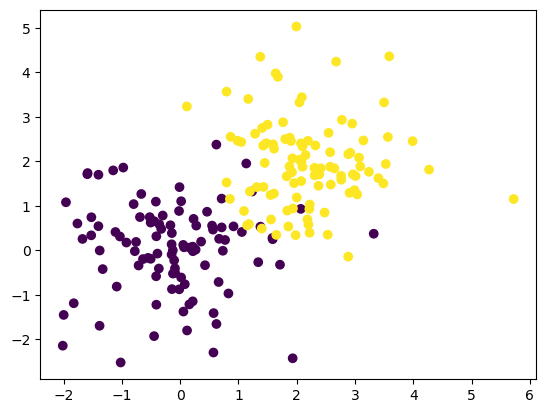

In [6]:
fig, ax = plt.subplots()

ax.scatter(train_data[:,0], train_data[:,1], c =train_labels)

Na tak utworzonym zbiorze wytrenujemy model regresji logistycznej

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_data, train_labels)

LogisticRegression()

Stwórzmy zbiór testowy poprzez rozszerzenie zakresu zbioru treningowego.

In [8]:
x_min, x_max = train_data[:,0].min() -1, train_data[:,0].max() +1
y_min, y_max = train_data[:,1].min() -1, train_data[:,1].max() +1

Funkcja ta zwraca meshgrid (czyli listę indeksów punktów z zadanego przedziału) na podstawie wygenerowanego zbioru danych.

In [12]:
xs, ys = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [24]:
print(xs.shape)
print(ys.shape)

(956, 974)
(956, 974)


In [16]:
y_pred = model.predict(np.column_stack((xs.flatten(),
                                       ys.flatten())))

In [17]:
print(y_pred.shape)

(931144,)

In [19]:
y_pred_matrix = y_pred.reshape(xs.shape)

In [21]:
y_pred_matrix

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

Dokonujemy predykcji oraz wyświetlamy wszystkie punkty pcolormeshem, żeby zobaczyć w jaki sposób regresja logistyczna dokonała podziału przestrzeni.

In [22]:
for x,y, pred in zip(xs, ys, y_pred_matrix):
    print(x, y, pred)
    
    break

[-3.01463357e+00 -3.00463357e+00 -2.99463357e+00 -2.98463357e+00
 -2.97463357e+00 -2.96463357e+00 -2.95463357e+00 -2.94463357e+00
 -2.93463357e+00 -2.92463357e+00 -2.91463357e+00 -2.90463357e+00
 -2.89463357e+00 -2.88463357e+00 -2.87463357e+00 -2.86463357e+00
 -2.85463357e+00 -2.84463357e+00 -2.83463357e+00 -2.82463357e+00
 -2.81463357e+00 -2.80463357e+00 -2.79463357e+00 -2.78463357e+00
 -2.77463357e+00 -2.76463357e+00 -2.75463357e+00 -2.74463357e+00
 -2.73463357e+00 -2.72463357e+00 -2.71463357e+00 -2.70463357e+00
 -2.69463357e+00 -2.68463357e+00 -2.67463357e+00 -2.66463357e+00
 -2.65463357e+00 -2.64463357e+00 -2.63463357e+00 -2.62463357e+00
 -2.61463357e+00 -2.60463357e+00 -2.59463357e+00 -2.58463357e+00
 -2.57463357e+00 -2.56463357e+00 -2.55463357e+00 -2.54463357e+00
 -2.53463357e+00 -2.52463357e+00 -2.51463357e+00 -2.50463357e+00
 -2.49463357e+00 -2.48463357e+00 -2.47463357e+00 -2.46463357e+00
 -2.45463357e+00 -2.44463357e+00 -2.43463357e+00 -2.42463357e+00
 -2.41463357e+00 -2.40463

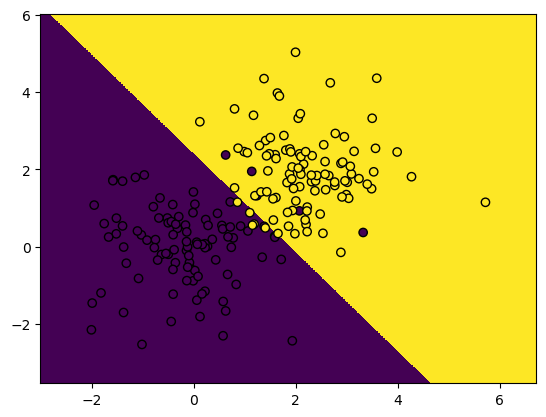

In [27]:
fig, ax = plt.subplots()
ax.pcolormesh(xs, ys, y_pred_matrix)
ax.scatter(train_data[:,0], train_data[:,1], c=train_labels, edgecolors = 'k')
plt.show()

Zwróćmy uwagę na fakt, że jest tutaj linia prosta.